<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 21: Examples

Associated Textbook Sections: [12.3](https://inferentialthinking.com/chapters/12/3/Deflategate.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-21:-Examples" data-toc-modified-id="Lecture-21:-Examples-1">Lecture 21: Examples</a></span><ul class="toc-item"><li><span><a href="#Set-Up-the-Notebook" data-toc-modified-id="Set-Up-the-Notebook-1.1">Set Up the Notebook</a></span></li><li><span><a href="#" data-toc-modified-id="-1.2"></a></span></li><li><span><a href="#Examples" data-toc-modified-id="Examples-1.3">Examples</a></span><ul class="toc-item"><li><span><a href="#Example:-Benford's-Law" data-toc-modified-id="Example:-Benford's-Law-1.3.1">Example: Benford's Law</a></span></li><li><span><a href="#Example:-Sleep-Survey" data-toc-modified-id="Example:-Sleep-Survey-1.3.2">Example: Sleep Survey</a></span></li></ul></li></ul></li></ul></div>

## Examples

### Example: Benford's Law

> Benford's law, also known as the Newcomb-Benford law, the law of anomalous numbers, or the first-digit law, is an observation that in many real-life sets of numerical data, the leading digit is likely to be small. [Source: Wikipedia Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law) In addition, here is [a good, clear explanation of Benford's law and its application to Data Science.](https://towardsdatascience.com/what-is-benfords-law-and-why-is-it-important-for-data-science-312cb8b61048)

Observe the distribution of the first digits of numbers according to Benford's model.

In [23]:
digits = np.arange(1, 10)
benford_model = np.log10(1 + 1/digits)
benford_model

array([0.30103   , 0.17609126, 0.12493874, 0.09691001, 0.07918125,
       0.06694679, 0.05799195, 0.05115252, 0.04575749])

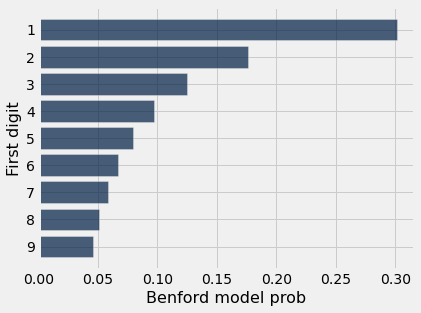

In [3]:
benford = Table().with_columns(
    'First digit', digits,
    'Benford model prob', benford_model)
benford.barh('First digit')

Explore the `first_digit` function.

In [4]:
# You are not asked to use or understand the [] notation in this course.
def first_digit(num):
    return int(str(num)[0])

In [6]:
first_digit(1234)

1

Load the `counties.csv` data.

In [7]:
# County populations from the census data
counties = Table.read_table('counties.csv')
counties = counties.where('SUMLEV', 50).select(5,6,9)\
                                       .relabeled(0,'State')\
                                       .relabeled(1,'County')\
                                       .relabeled(2,'Population')
counties.show(3)

State,County,Population
Alabama,Autauga County,54684
Alabama,Baldwin County,183216
Alabama,Barbour County,27336


Apply `first_digit` to add a column to the `counties` table that shows the first digit of the population sizes.

In [12]:
firstDigitArray = counties.apply(first_digit, "Population")
counties = counties.with_column("First digit", firstDigitArray)
counties

State,County,Population,First digit
Alabama,Autauga County,54684,5
Alabama,Baldwin County,183216,1
Alabama,Barbour County,27336,2
Alabama,Bibb County,22879,2
Alabama,Blount County,57344,5
Alabama,Bullock County,10886,1
Alabama,Butler County,20945,2
Alabama,Calhoun County,118443,1
Alabama,Chambers County,34111,3
Alabama,Cherokee County,25968,2


Visually compare the distribution of first digits from the counties data and Benford's proportions.

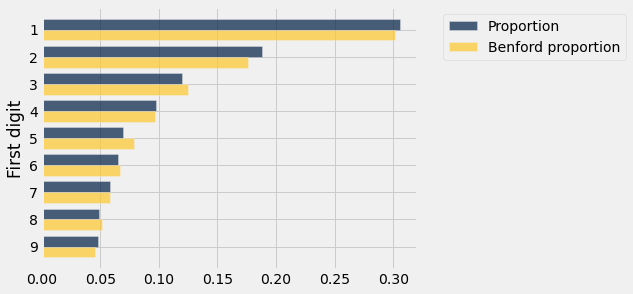

In [15]:
num_counties = counties.num_rows
by_digit = counties.group('First digit')
proportions = by_digit.column('count')/num_counties
by_digit = by_digit.with_columns(
    'Proportion', proportions,
    'Benford proportion', benford_model
)
by_digit.drop('count').barh('First digit')

Test whether or not the distribution of proportions in `counties` is consistent with Benford's model.

Null hypothesis: The observed proportions of first digits follow Benford's model: its variations from that model reflect random variation.

Alternative hypothesis: Our observed data is too different from Benford's model - it's not just a random variation from it.

Test statistic: TVD: Total Variation Distance: difference between each digit's observed proportion compared with Benford's model, summed

Fill in the blank with "Bigger" or "Smaller":

Bigger values of the test statistic favor the alternative

In [16]:
observed_tvd = sum(abs(proportions - benford_model))/2
observed_tvd

0.01922756971800583

In [21]:
sample_proportions(num_counties, benford_model)

array([0.30108211, 0.17982177, 0.12730745, 0.09388924, 0.07511139,
       0.06779122, 0.05060471, 0.05569701, 0.0486951 ])

In [27]:
simulated_frequencies = sample_proportions(num_counties, benford_model)
tvd = sum(abs(simulated_frequencies - benford_model))/2
tvd

0.02447622053637414

In [28]:
def simulate_county_first_digits():
    simulated_frequencies = sample_proportions(num_counties, benford_model)
    tvd = sum(abs(simulated_frequencies - benford_model))/2
    return tvd

In [29]:
simulated_tvds = make_array()

for i in np.arange(10000):
    simulated_tvds = np.append(simulated_tvds, simulate_county_first_digits())

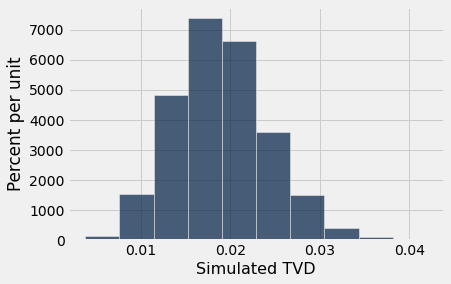

In [30]:
Table().with_column('Simulated TVD', simulated_tvds).hist(0)

In [31]:
np.count_nonzero(simulated_tvds >= observed_tvd) / 10000

0.4576

Are the data consistent with the null hypothesis?

Yes, the above p-value of 0.4576 is well above our 5% cut-off. So we have confirmed the null hypotheis

### Example: Sleep Survey

Load the data from `welcome_survey_v4.csv` that contains information on the hours of sleep and sleep position for 1322 UC Berkeley students.

In [38]:
survey = Table.read_table('welcome_survey_v4.csv')
survey

Year,Extraversion,Number of textees,Hours of sleep,Handedness,Sleep position
Second,6,10,7,Right-handed,On your back
Fourth or above,9,25,7,Right-handed,On your left side
First,7,5,8,Right-handed,On your stomach
Second,5,6,8,Right-handed,On your right side
Second,5,10,7,Right-handed,On your right side
Third,8,3,8,Right-handed,On your stomach
Third,8,2,5,Right-handed,On your left side
Second,7,5,6,Right-handed,On your right side
First,8,6,7,Right-handed,On your right side
First,4,5,7,Left-handed,On your right side


Simplify the categories for `Sleep position` by combining left-side and right-side sleeper as `side` and back and stomach sleepers as `back or stomach`. Create a smaller table with just the simplified sleep positions and the hours of sleep.

In [39]:
def simplify(sleep_position):
    if sleep_position == 'On your left side' or sleep_position == 'On your right side':
        return 'side'
    else:
        return 'back or stomach'
    
survey = survey.select("Hours of sleep").with_column("position", survey.apply(simplify, "Sleep position"))
survey

Hours of sleep,position
7,back or stomach
7,side
8,back or stomach
8,side
7,side
8,back or stomach
5,side
6,side
7,side
7,side


Determine the average hours of sleep for the two different sleep positions.

In [40]:
survey.group("position", np.mean)

position,Hours of sleep mean
back or stomach,7.12792
side,7.0328


Test whether or not there is a significant difference between the average hours of sleep for those that sleep on their side and on their back or stomach.

Null hypothesis: Sleep position is not correlated with a different number of hours of sleep: the difference we see is just random variation.

Alternative hypothesis: Our observed difference between hours of sleep based on sleep position is too large to be explained by random variation.

Test statistic: Difference between the averages of the two groups: Average hours for "back or stomach" minus "side".

Fill in the blank with "Bigger" or "Smaller":

Bigger values of the test statistic favor the alternative

In [44]:
def compute_test_statistic(tbl, col):
    grouped = tbl.group(col, np.average)
    avgs = grouped.column('Hours of sleep average')
    return avgs.item(1) - avgs.item(0)

obs_test_stat = compute_test_statistic(survey, 'position')
obs_test_stat

-0.09512125823477291

In [42]:
random_labels = survey.sample(with_replacement=False).column('position')
random_labels

array(['side', 'back or stomach', 'back or stomach', ...,
       'back or stomach', 'side', 'side'], dtype='<U15')

In [47]:
def simulate_under_null():
    random_labels = survey.sample(with_replacement=False).column('position')
    relabeled_tbl = survey.with_column('shuffled position', random_labels)
    return compute_test_statistic(relabeled_tbl, 'shuffled position')

simulate_under_null()

-0.07443078938243985

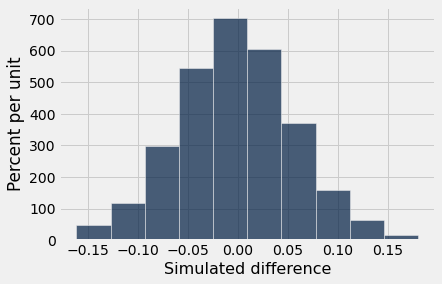

In [48]:
simulated_diffs = make_array()
for i in np.arange(1000):
    null_stat = simulate_under_null()
    simulated_diffs = np.append(simulated_diffs, null_stat)
    
Table().with_column('Simulated difference', simulated_diffs).hist(0)

In [50]:
obs_test_stat

-0.09512125823477291

In [49]:
np.mean(simulated_diffs <= obs_test_stat)

0.051

Are the results significant?

p-value above is 0.051, so that's 5.1%. It's almost statistically significant, but not quite. So we confirm the null hypothesis, and recommend further study.

<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>